In [2]:
#Выполнил Симаньков Александр Евгеньевич 1ПИб-02-2ОП-22 Лабораторная работа №5 Практическая статистика и визуализация с Python

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from clickhouse_driver import Client
from scipy.stats import shapiro

ModuleNotFoundError: No module named 'scipy'

In [4]:
# 1. Подключение к ClickHouse и загрузка данных
client = Client(host='oleg.orbita.work', port=9000, user='student_ml', password='CGRV8zemLGgsfdz7Uc6ZJeisGTcPQa', settings={'use_numpy': True})
query = "SELECT * FROM students_datas.house_train"
df = pd.DataFrame(client.execute(query))

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1460 non-null   int64  
 1   1       1460 non-null   int64  
 2   2       1460 non-null   object 
 3   3       1201 non-null   float64
 4   4       1460 non-null   int64  
 5   5       1460 non-null   object 
 6   6       91 non-null     object 
 7   7       1460 non-null   object 
 8   8       1460 non-null   object 
 9   9       1460 non-null   object 
 10  10      1460 non-null   object 
 11  11      1460 non-null   object 
 12  12      1460 non-null   object 
 13  13      1460 non-null   object 
 14  14      1460 non-null   object 
 15  15      1460 non-null   object 
 16  16      1460 non-null   object 
 17  17      1460 non-null   int64  
 18  18      1460 non-null   int64  
 19  19      1460 non-null   int64  
 20  20      1460 non-null   int64  
 21  21      1460 non-null   object 
 22  

In [6]:
# 2. Приведите описание датасета:
# 2.1. Сколько данных в датасете?
print(df.shape)

(1460, 81)


In [7]:
# 2.2.Сколько параметров? Выведите список всех параметров.
print(df.columns.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


In [8]:
# 2.3.Есть ли категориальные признаки? Перечислите / выведите их
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

[2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 39, 40, 41, 42, 53, 55, 57, 58, 60, 63, 64, 65, 72, 73, 74, 78, 79]


In [9]:
# 2.4.Выведите первые пять строчек DataFrame.
print(df.head())

   0   1   2     3      4     5     6    7    8       9   ... 71    72    73  \
0   1  60  RL  65.0   8450  Pave  None  Reg  Lvl  AllPub  ...  0  None  None   
1   2  20  RL  80.0   9600  Pave  None  Reg  Lvl  AllPub  ...  0  None  None   
2   3  60  RL  68.0  11250  Pave  None  IR1  Lvl  AllPub  ...  0  None  None   
3   4  70  RL  60.0   9550  Pave  None  IR1  Lvl  AllPub  ...  0  None  None   
4   5  60  RL  84.0  14260  Pave  None  IR1  Lvl  AllPub  ...  0  None  None   

     74 75  76    77  78       79      80  
0  None  0   2  2008  WD   Normal  208500  
1  None  0   5  2007  WD   Normal  181500  
2  None  0   9  2008  WD   Normal  223500  
3  None  0   2  2006  WD  Abnorml  140000  
4  None  0  12  2008  WD   Normal  250000  

[5 rows x 81 columns]


In [10]:
# 3. Проверьте, есть ли пропуски и повторы в данных.
print(df.isnull().sum().sort_values(ascending=False))

72    1453
74    1406
6     1369
73    1179
25     872
      ... 
76       0
77       0
78       0
79       0
80       0
Length: 81, dtype: int64


In [11]:
print("Дубликаты")
print(df.duplicated().sum())

Дубликаты
0


In [12]:
# 3.1.Удалите повторы
print("Дубликаты удалены")
df = df.drop_duplicates()
print(df.duplicated().sum())

Дубликаты удалены
0


In [13]:
# 3.2.Удалите столбцы в которых пропущено более 15% данных
threshold = len(df) * 0.15
cols_to_drop = df.columns[df.isnull().sum() > threshold]
df = df.drop(cols_to_drop, axis=1)
print(">15 % пропусков")
print(f"{list(cols_to_drop)}")

>15 % пропусков

[3, 6, 25, 57, 72, 73, 74]


In [14]:
# 4. Постройте гистограмму параметра SalePrice, Подчиняется ли распределение нормальному?
query_meta = "DESCRIBE TABLE students_datas.house_train"
meta = client.execute(query_meta)
print("Метаданные таблицы:")
i = 0
for row in meta:
    print(i,row)
    i += 1
    
COLUMN_MAPPING = {
    'Id': 0,
    'CentralAir': 41,
    'GrLivArea': 46,
    'GarageCars': 61,
    'SalePrice': 80
}

# Переименовываем нужные столбцы
for name, col_num in COLUMN_MAPPING.items():
    df.rename(columns={col_num: name}, inplace=True)

# Проверяем результат
print("Переименованные столбцы:")
print(df[[*COLUMN_MAPPING.keys()]].head())


Метаданные таблицы:
0 ['Id' 'Int16' '' '' '' '' '']
1 ['MSSubClass' 'Int16' '' '' '' '' '']
2 ['MSZoning' 'LowCardinality(String)' '' '' '' '' '']
3 ['LotFrontage' 'Nullable(Float32)' '' '' '' '' '']
4 ['LotArea' 'Int64' '' '' '' '' '']
5 ['Street' 'LowCardinality(String)' '' '' '' '' '']
6 ['Alley' 'Nullable(String)' '' '' '' '' '']
7 ['LotShape' 'LowCardinality(String)' '' '' '' '' '']
8 ['LandContour' 'LowCardinality(String)' '' '' '' '' '']
9 ['Utilities' 'LowCardinality(String)' '' '' '' '' '']
10 ['LotConfig' 'LowCardinality(String)' '' '' '' '' '']
11 ['LandSlope' 'LowCardinality(String)' '' '' '' '' '']
12 ['Neighborhood' 'LowCardinality(String)' '' '' '' '' '']
13 ['Condition1' 'LowCardinality(String)' '' '' '' '' '']
14 ['Condition2' 'LowCardinality(String)' '' '' '' '' '']
15 ['BldgType' 'LowCardinality(String)' '' '' '' '' '']
16 ['HouseStyle' 'LowCardinality(String)' '' '' '' '' '']
17 ['OverallQual' 'Int8' '' '' '' '' '']
18 ['OverallCond' 'Int8' '' '' '' '' '']
19 ['Yea

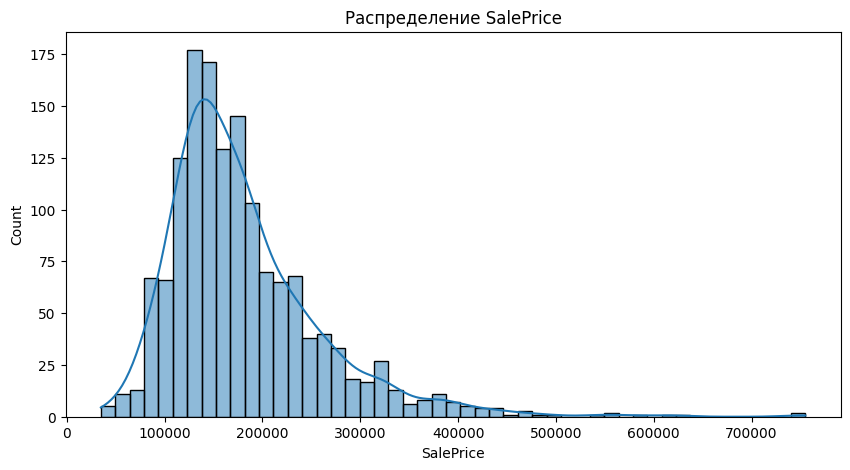

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение SalePrice')
plt.show()

In [16]:
from scipy.stats import shapiro
stat, p = shapiro(df['SalePrice'].sample(5000)) if len(df) > 5000 else shapiro(df['SalePrice'])
print(f"{p:.4f}")
print("Распределение не нормальное, так как оно меньше 0.05")


0.0000
Распределение не нормальное, так как оно меньше 0.05


In [17]:
# 5. Построить коробочную диаграмму (ящик с усами) признака SalePrice всех домов в данных.

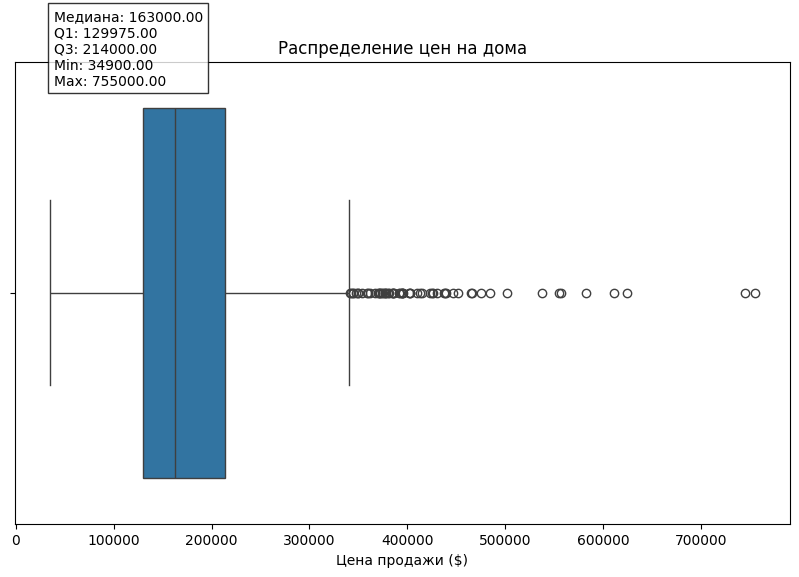


Обнаружено 61 выбросов (> 340037.50)


In [18]:
# 5. Боксплот SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title(f'Распределение цен на дома')
plt.xlabel('Цена продажи ($)')

stats = df['SalePrice'].describe()
plt.text(0.05, 0.95, 
         f"Медиана: {stats['50%']:.2f}\n"
         f"Q1: {stats['25%']:.2f}\n"
         f"Q3: {stats['75%']:.2f}\n"
         f"Min: {stats['min']:.2f}\n"
         f"Max: {stats['max']:.2f}",
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Дополнительный анализ выбросов
Q1 = stats['25%']
Q3 = stats['75%']
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
outliers = df[df['SalePrice'] > upper_bound]
print(f"\nОбнаружено {len(outliers)} выбросов (> {upper_bound:.2f})")

In [19]:
# 6. Постройте Гистограммы и Боксплоты по группам:

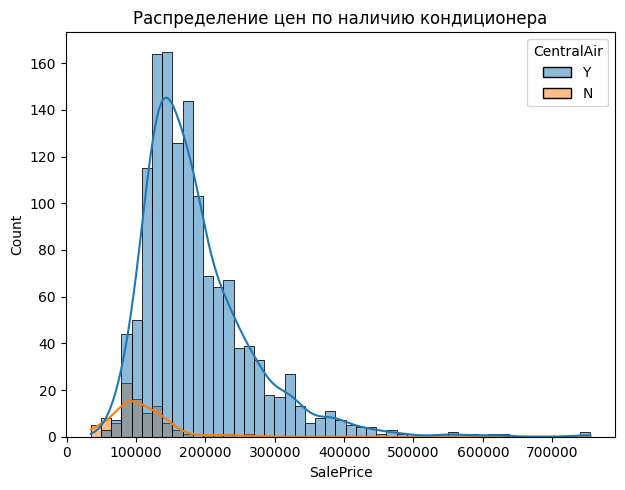

In [20]:
# 6.1. кондиционером ('CentralAir') и без кондиционера
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='SalePrice', hue='CentralAir', kde=True)
plt.title('Распределение цен по наличию кондиционера')

plt.tight_layout()
plt.show()

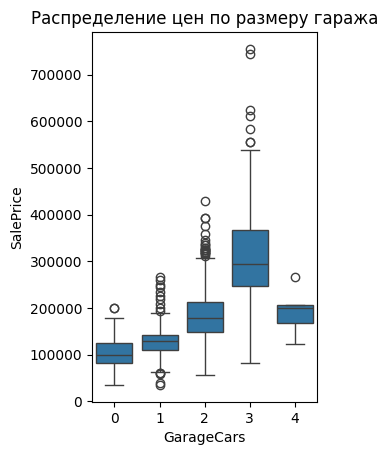

In [31]:
#6.1. Без кондиционера
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='GarageCars', y='SalePrice')
plt.title('Распределение цен по размеру гаража')
plt.show()

In [22]:
# 7. Постройте гистограмму частот:

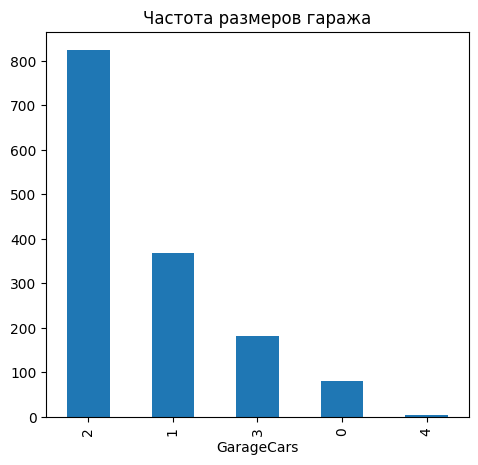

In [23]:
# 7.1.частот размеров гаража
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['GarageCars'].value_counts().plot(kind='bar')
plt.title('Частота размеров гаража')
plt.show()

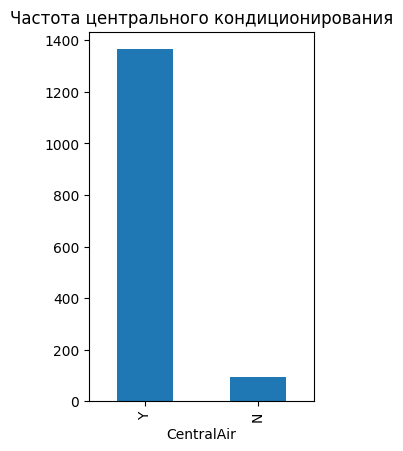

In [24]:
# 7.2.частот центрального кондиционирования
plt.subplot(1, 2, 2)
df['CentralAir'].value_counts().plot(kind='bar')
plt.title('Частота центрального кондиционирования')
plt.show()

In [25]:
# 8. Рассчитайте долю домов

In [26]:
# 8.1.с продажной ценой между 25-м процентилем и 75-м процентилем.
q25, q75 = df['SalePrice'].quantile([0.25, 0.75])
within_iqr = df[(df['SalePrice'] >= q25) & (df['SalePrice'] <= q75)]
print(f"{len(within_iqr)/len(df):.2%}")

50.21%


In [27]:
# 8.2.Рассчитайте долю домов с общей площадью в квадратных футах от 25-го процентиля до 75-го процентиля .
q25_area, q75_area = df['GrLivArea'].quantile([0.25, 0.75])
within_iqr_area = df[(df['GrLivArea'] >= q25_area) & (df['GrLivArea'] <= q75_area)]
print(f"{len(within_iqr_area)/len(df):.2%}")

50.00%


In [28]:
# 9. Получите ковариационную матрицу для всех данных DataFrame и используйте анализ тепловой карты, Выведетите 10 параметров с наибольшей корреляцией с SalePrice

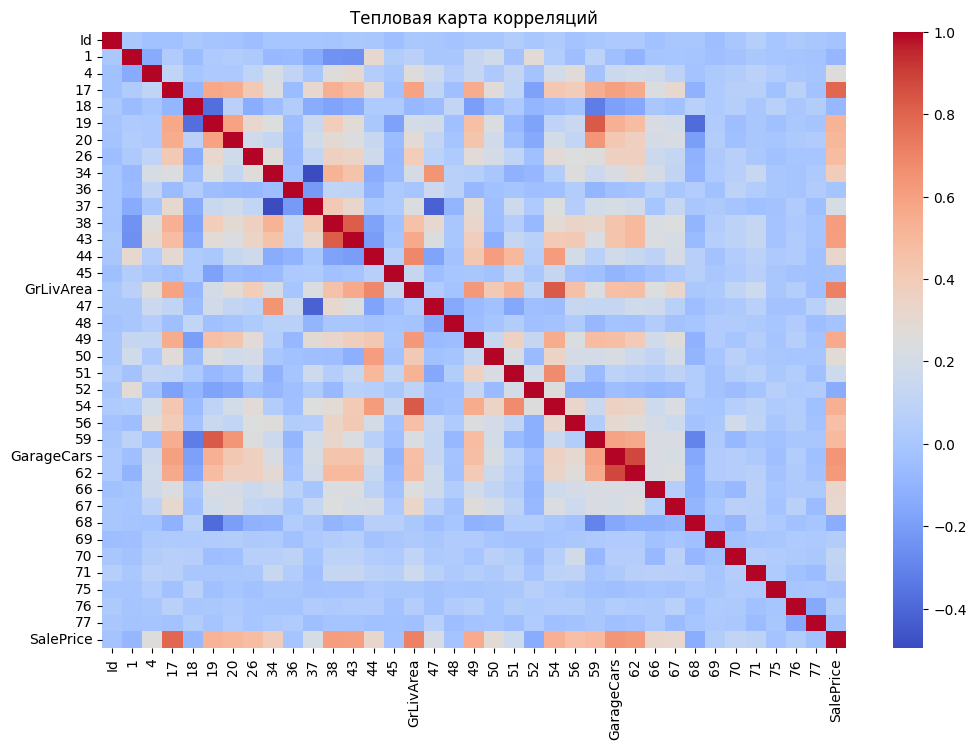

In [29]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.show()

In [30]:
# 9. Корреляционный анализ
corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(11)[1:]
print("10 параметров с наибольшей корреляцией с SalePrice:")
print(corr)

10 параметров с наибольшей корреляцией с SalePrice:
17            0.790982
GrLivArea     0.708624
GarageCars    0.640409
62            0.623431
38            0.613581
43            0.605852
49            0.560664
54            0.533723
19            0.522897
20            0.507101
Name: SalePrice, dtype: float64
